# Classifying Gcn4 ADs into categories from [TADA Paper](https://www.nature.com/articles/s41586-024-07707-3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from TADA_T2.TADA import predict, predict_from_fasta


In [2]:
# Read in Gcn4 data
fn = "../adhunter/data/OrthologTilingDFwActivities_20220131.csv"
df = pd.read_csv(fn)
df = df.loc[df.Activity != 0.0]
df = df.iloc[:, 1:]
df = df.loc[df.loc[:, ['Seq', 'Activity']].drop_duplicates().index]


seqs = df.Seq.to_numpy()
activity = df.Activity.to_numpy()
thresh = 80_000
# # get binary labels based on threshold
# y_bin = (activity >= thresh).astype(np.int64).reshape(-1, 1)
# # scale data to have mean 0 and variance 1
# y_cont = activity.reshape(-1, 1)
# scaler = preprocessing.StandardScaler().fit(y_cont)
# y_cont = scaler.transform(y_cont)


# convert seqs to integer valued vectors
alphabet="ACDEFGHIKLMNPQRSTVWY"
aa_to_i = {aa:i for i, aa in enumerate(alphabet)}
i_to_aa = {i:aa for i, aa in enumerate(alphabet)}
X = np.asarray([[aa_to_i[aa] for aa in x] for x in seqs])

In [3]:
from TADA_T2.backend.features import create_features
features = create_features(seqs)

In [4]:
from sklearn.cluster import KMeans

features_flattened = features.reshape(features.shape[0], -1)
kmeans = KMeans(n_clusters=6, random_state=0, n_init=10).fit(features_flattened)

In [5]:
df["kmeans"] = kmeans.labels_

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# pca = PCA(n_components=50)
# X_pca = pca.fit_transform(features_flattened)
fit = umap.UMAP()
# X_umap = fit.fit_transform(X_pca)
X_umap = fit.fit_transform(features_flattened)

/opt/homebrew/Caskroom/miniconda/base/envs/tada/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/homebrew/Caskroom/miniconda/base/envs/tada/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


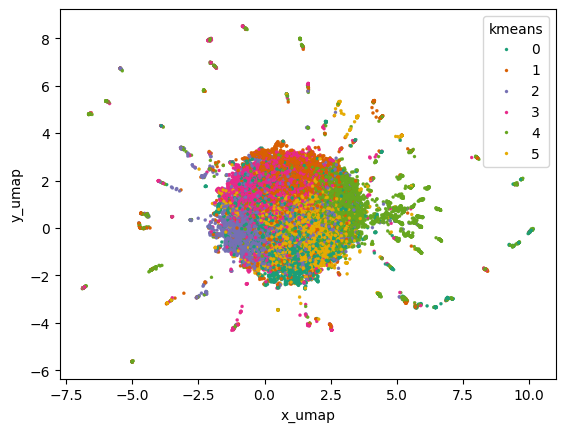

In [7]:
x, y = X_umap.transpose()
# df.loc[:, ["x_umap", "y_umap"]] = (x, y)
df["x_umap"] = x
df["y_umap"] = y
sns.scatterplot(df,
                x='x_umap', y='y_umap', hue='kmeans',
                edgecolor=None, s=5, palette="Dark2")
plt.show()

Read in PADI's tSNE clusters + seqs

In [8]:
padi = pd.read_csv("../data/tsne-clustering_6clusters.csv")
padi_seqs = padi["sequence"]
padi_features = create_features(padi_seqs)

In [9]:
pd.concat([padi, df])

,Unnamed: 0,tsne-1,tsne-2,label,idx,name,scale_score,sequence,SpeciesNames,NativeLocation,NormLocation,Seq,Activity,kmeans,x_umap,y_umap
0,0.0,38.848900,22.861152,1.0,94.0,ARF17_11-50,2.220723,PFPPAKRLKYPQPGGGFLSGDDGEILYPQSGLSSAAAPDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,4.418734,-10.805563,5.0,105.0,ARF17_51-90,1.229074,SPSMFSYSTFPAGMQGARQYDFGSFNPTGFIGGNPPQLFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2.802221,-9.678310,5.0,106.0,ARF17_61-100,1.949662,PAGMQGARQYDFGSFNPTGFIGGNPPQLFTNNFLSPLPDL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,-10.171829,-36.767071,4.0,123.0,ARF19_11-50,2.844980,PPFFRPKYPRQPGMPDDELDMENAFKRAMPWMGEDFGMKD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,28.967302,22.871886,1.0,133.0,ARF19_201-240,1.352127,SQLQQQSMLPTGAKMTHQNINSMGNKGLSQMTSFAQEMQF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tmar_XP_002151511.1_TalaromycesMarneffeiATCC18224,210.0,86.0,DPADPVAVKRARNTMAARKSRRRKLEKQEQMEDRIRELEA,24922.132950,4.0,-4.314923,-1.794482
88363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tmar_XP_002151511.1_TalaromycesMarneffeiATCC18224,215.0,91.0,VAVKRARNTMAARKSRRRKLEKQEQMEDRIRELEAMLAKS,16670.336716,4.0,6.547352,0.814372
88364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tmar_XP_002151511.1_TalaromycesMarneffeiATCC18224,220.0,96.0,ARNTMAARKSRRRKLEKQEQMEDRIRELEAMLAKSEKDVQ,8059.752238,4.0,4.891986,0.459774
88365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tmar_XP_002151511.1_TalaromycesMarneffeiATCC18224,225.0,101.0,AARKSRRRKLEKQEQMEDRIRELEAMLAKSEKDVQYWKAM,53558.456206,4.0,5.669097,0.300073


In [10]:
padi_features_flattened = padi_features.reshape(padi_features.shape[0], -1)
all_feats = np.concatenate([features_flattened, padi_features_flattened])
kmeans_both = KMeans(n_clusters=6, random_state=0, n_init=10).fit(all_feats)

In [11]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(all_feats)
fit = umap.UMAP()
# X_umap = fit.fit_transform(X_pca)
X_umap = fit.fit_transform(all_feats)
x, y = X_umap.transpose()
# X_umap = fit.fit_transform(features_flattened)

/opt/homebrew/Caskroom/miniconda/base/envs/tada/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [12]:
f2 = TSNE(perplexity=X_pca.shape[0] // 100, metric="cosine")
X_tsne = f2.fit_transform(X_pca)
xt, yt = X_tsne.transpose()

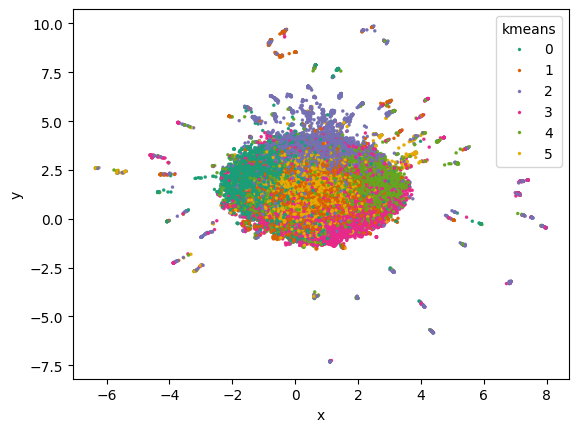

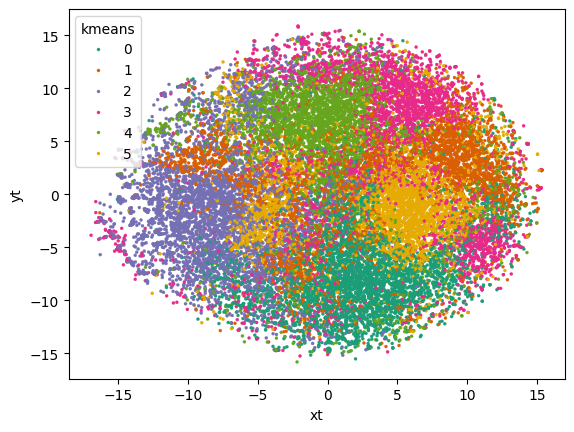

In [13]:
res = pd.DataFrame({
    "x": x,
    "y": y,
    "xt": xt,
    "yt": yt,
    "kmeans": kmeans_both.labels_,})

sns.scatterplot(res, x='x', y='y', hue='kmeans', edgecolor=None, s=5, palette="Dark2")
plt.show()
sns.scatterplot(res, x='xt', y='yt', hue='kmeans', edgecolor=None, s=5, palette="Dark2")
plt.show()